In [155]:
!pip install gower

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
from sklearn.model_selection import train_test_split
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,plot_precision_recall_curve,f1_score,accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy import stats
import itertools  
from scipy.stats import mannwhitneyu
from sklearn.tree import  plot_tree 
import numpy as np
# selection of algorithms to consider and set performance measure
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
import os
from sklearn.ensemble import IsolationForest
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')
os.getcwd()

'D:\\UofT\\MMA\\RSM8521\\RSM8521_FinalProject_Team6\\Service_temp'

In [156]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import gower

In [41]:
df = pd.read_csv(r'Understanding and Managing Employee Turnover.csv')
df = df.set_index('Unnamed: 0')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,College,Life_Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
2,49,No,Travel_Frequently,279,Research_Development,8,Below_College,Life_Sciences,High,Male,...,Outstanding,Very_High,1,10,3,Better,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research_Development,2,College,Other,Very_High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
5,33,No,Travel_Frequently,1392,Research_Development,3,Master,Life_Sciences,Very_High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
7,27,No,Travel_Rarely,591,Research_Development,2,Below_College,Medical,Low,Male,...,Excellent,Very_High,1,6,3,Better,2,2,2,2


In [42]:
df_binned = df.copy(deep=True)

In [43]:
int64_columns = df_binned.select_dtypes(include='int64').columns.tolist()
object_columns = df_binned.select_dtypes(include='object').columns.tolist()
int64_columns.remove('MonthlyIncome')

In [44]:
num_bins = 5

for col in int64_columns:
    df_binned[f'{col}_binned'] = pd.cut(df_binned[col], bins=num_bins, labels=False)
df_binned.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate_binned,NumCompaniesWorked_binned,PercentSalaryHike_binned,StockOptionLevel_binned,TotalWorkingYears_binned,TrainingTimesLastYear_binned,YearsAtCompany_binned,YearsInCurrentRole_binned,YearsSinceLastPromotion_binned,YearsWithCurrManager_binned
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,College,Life_Sciences,Medium,Female,...,3,4,0,0,0,0,0,1,0,1
2,49,No,Travel_Frequently,279,Research_Development,8,Below_College,Life_Sciences,High,Male,...,4,0,4,1,1,2,1,1,0,2
4,37,Yes,Travel_Rarely,1373,Research_Development,2,College,Other,Very_High,Male,...,0,3,1,0,0,2,0,0,0,0
5,33,No,Travel_Frequently,1392,Research_Development,3,Master,Life_Sciences,Very_High,Female,...,4,0,0,0,0,2,0,1,0,0
7,27,No,Travel_Rarely,591,Research_Development,2,Below_College,Medical,Low,Male,...,2,4,0,1,0,2,0,0,0,0


## Q1. Utilize proper statistical analysis and visualization techniques to present an overview of the distribution of average monthly income among various groups (using personal judgment). Provide an explanation of the findings.

In [45]:
sig_list = []

for column in df_binned.columns:
    if (column in int64_columns) | (column == 'MonthlyIncome'):
        continue
    else:
        groups = df_binned.groupby(column)['MonthlyIncome'].apply(list)

        # Perform the one-way ANOVA test
        f_value, p_value = f_oneway(*groups)

        # Print the results
        print(f"Variable Name: {column}")
        print(f"F-value: {f_value:.4f}")
        print(f"P-value: {p_value:.4f}")
        if p_value<0.05:
            sig_list.append(column)
            print(f"*******!!** Significant **!!**********")
        print(f"======================================")
        print()

Variable Name: Attrition
F-value: 38.4888
P-value: 0.0000
*******!!** Significant **!!**********

Variable Name: BusinessTravel
F-value: 1.1149
P-value: 0.3282

Variable Name: Department
F-value: 3.2018
P-value: 0.0410
*******!!** Significant **!!**********

Variable Name: Education
F-value: 3.8930
P-value: 0.0038
*******!!** Significant **!!**********

Variable Name: EducationField
F-value: 1.9722
P-value: 0.0800

Variable Name: EnvironmentSatisfaction
F-value: 0.4100
P-value: 0.7458

Variable Name: Gender
F-value: 1.4915
P-value: 0.2222

Variable Name: JobInvolvement
F-value: 0.3303
P-value: 0.8035

Variable Name: JobRole
F-value: 810.2141
P-value: 0.0000
*******!!** Significant **!!**********

Variable Name: JobSatisfaction
F-value: 0.0270
P-value: 0.9940

Variable Name: MaritalStatus
F-value: 5.9048
P-value: 0.0028
*******!!** Significant **!!**********

Variable Name: OverTime
F-value: 0.0544
P-value: 0.8156

Variable Name: PerformanceRating
F-value: 0.4304
P-value: 0.5119

Variab

In [46]:
sig_list

['Attrition',
 'Department',
 'Education',
 'JobRole',
 'MaritalStatus',
 'Age_binned',
 'JobLevel_binned',
 'NumCompaniesWorked_binned',
 'StockOptionLevel_binned',
 'TotalWorkingYears_binned',
 'YearsAtCompany_binned',
 'YearsInCurrentRole_binned',
 'YearsSinceLastPromotion_binned',
 'YearsWithCurrManager_binned']

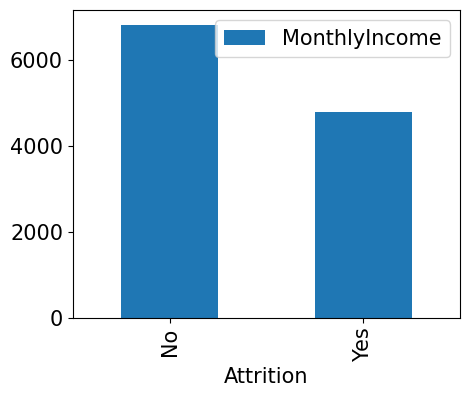

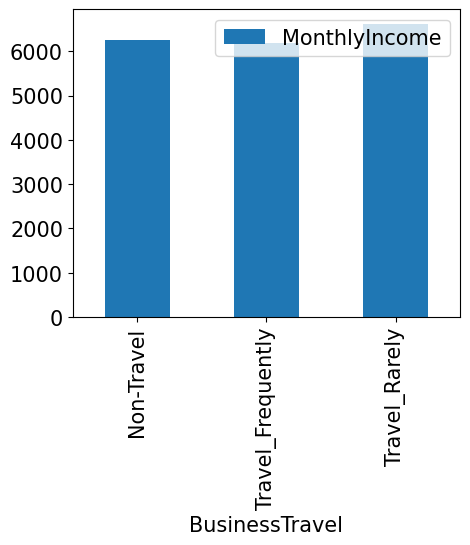

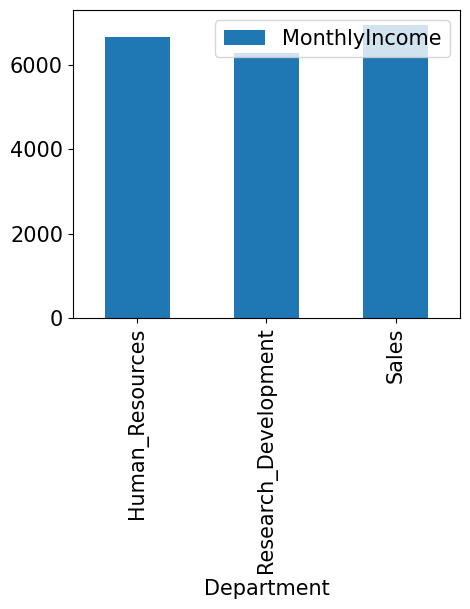

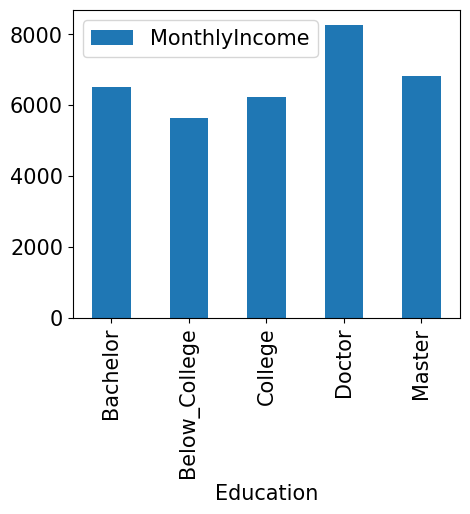

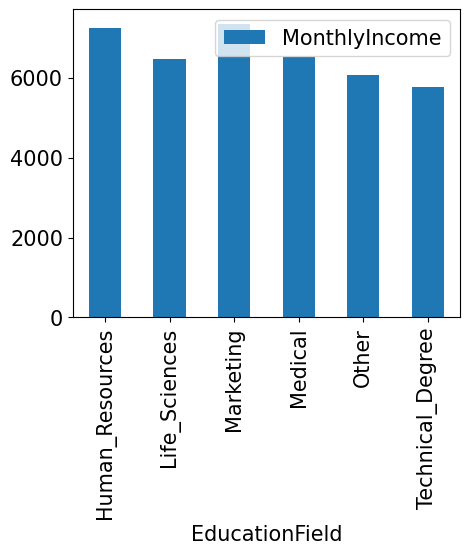

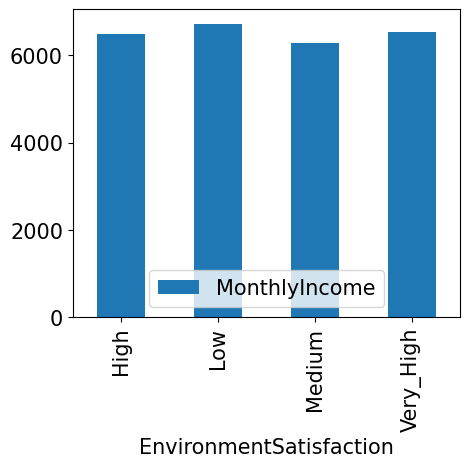

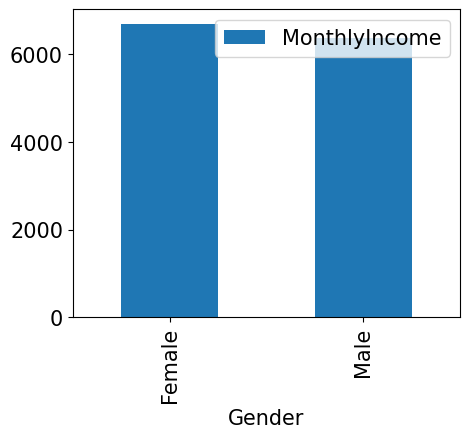

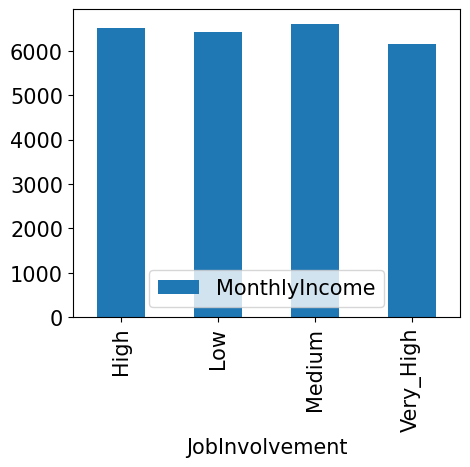

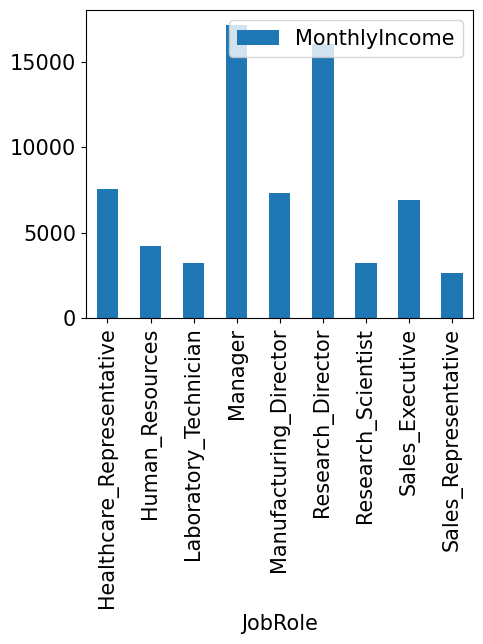

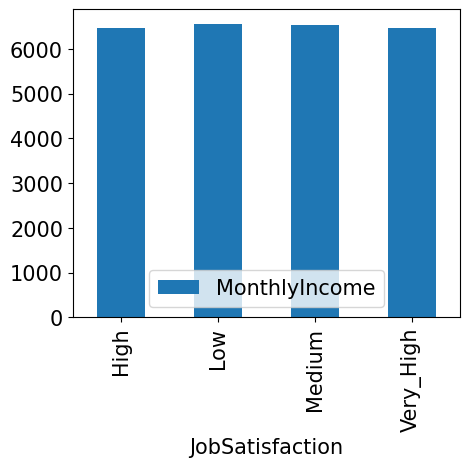

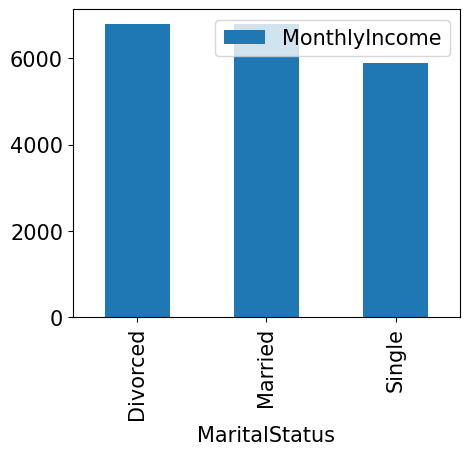

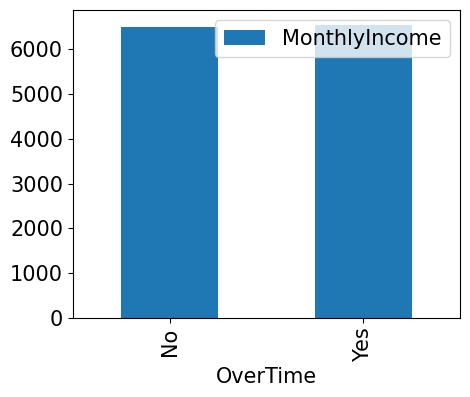

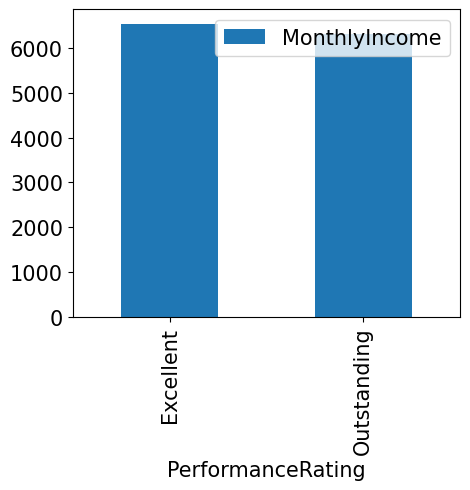

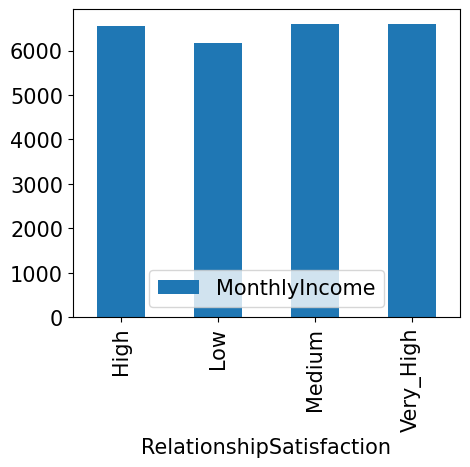

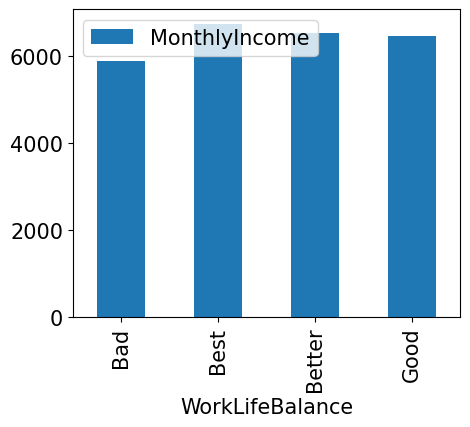

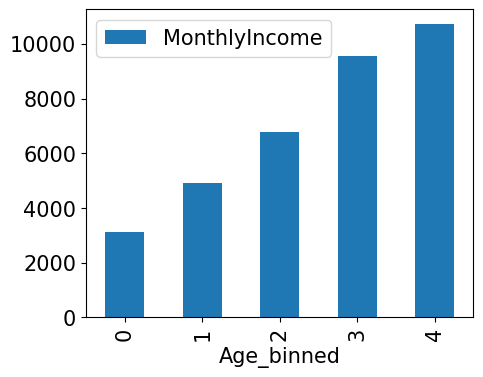

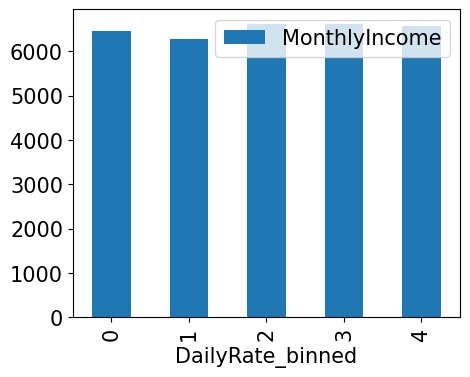

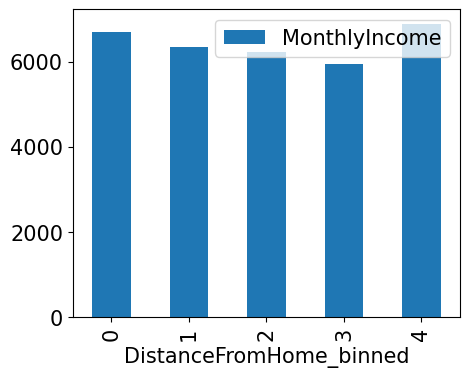

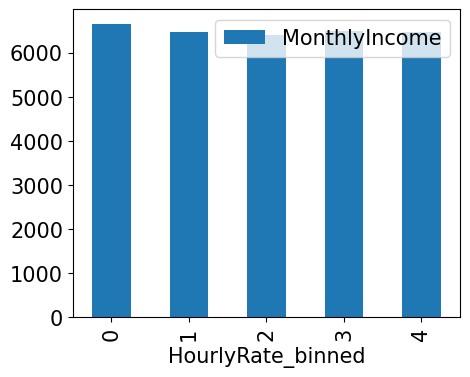

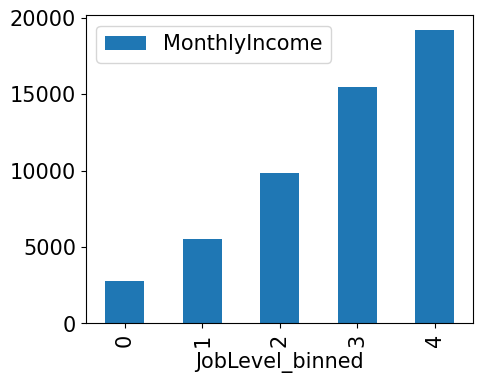

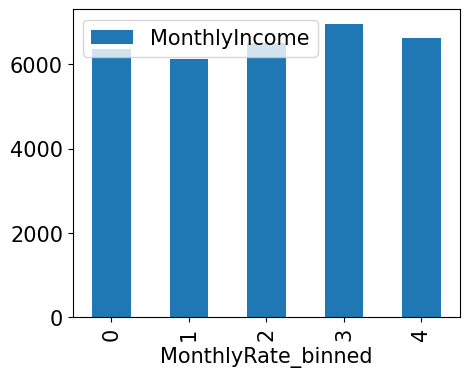

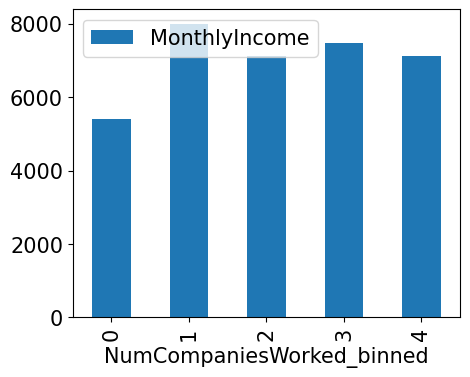

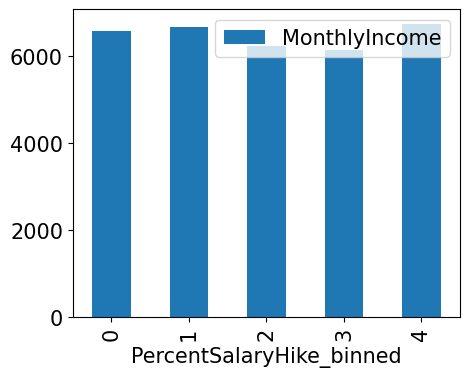

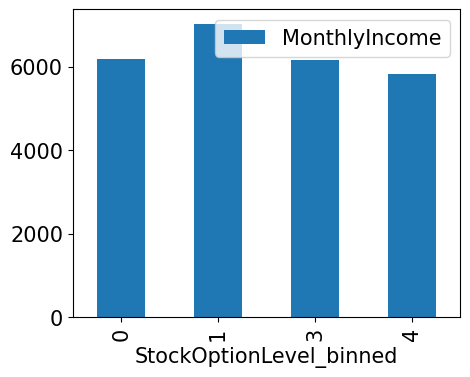

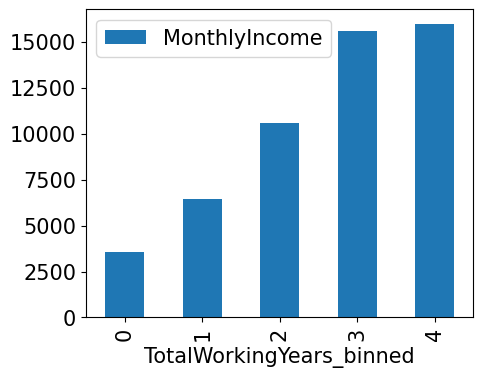

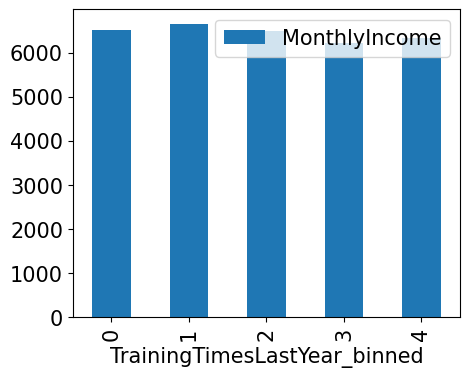

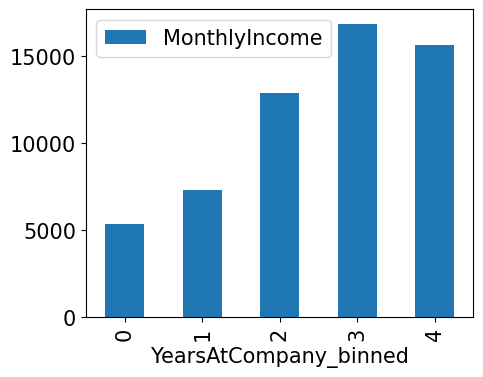

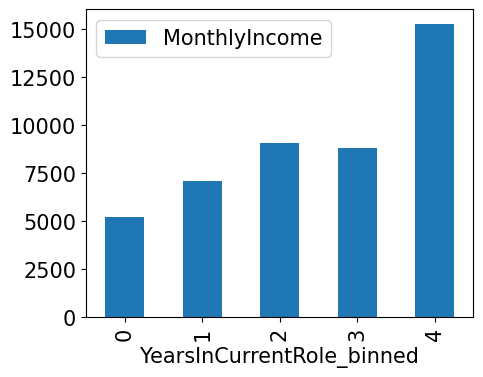

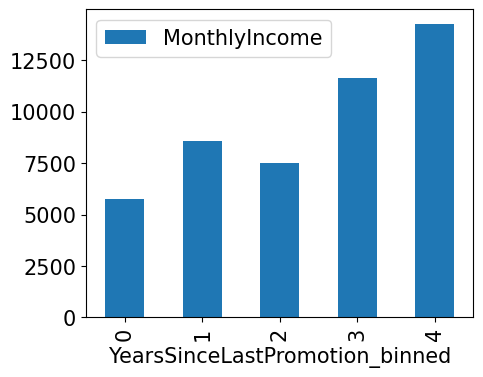

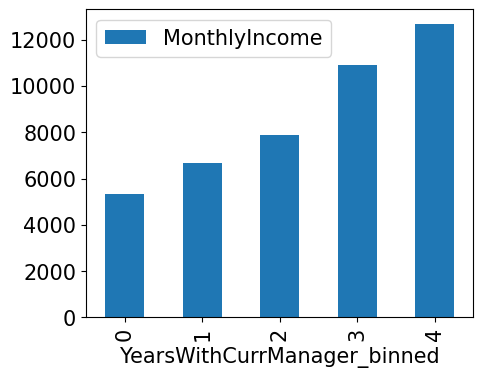

In [47]:
for col in df_binned.columns:
    if (col in int64_columns) | (col == 'MonthlyIncome'):
        continue
    else:
        grouped = df_binned.groupby([col])['MonthlyIncome'].mean().reset_index().round(2)
        grouped.set_index(col,inplace=True)
        grouped.plot(kind="bar", figsize=(5,4))

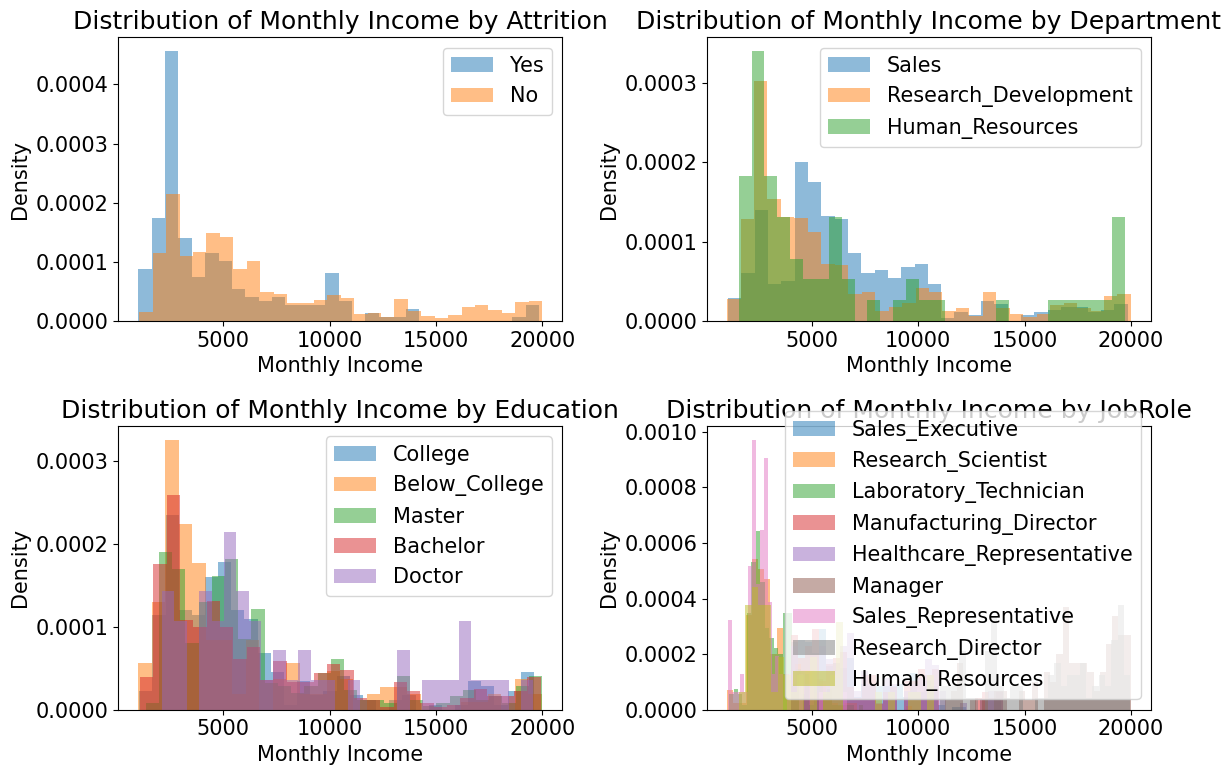

In [48]:
groups = ['Attrition', 'Department', 'Education', 'JobRole']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Define a function to create histograms for each group
def plot_histogram(group, ax):
    categories = df_binned[group].unique()
    for category in categories:
        category_data = df_binned[df_binned[group] == category]['MonthlyIncome']
        ax.hist(category_data, alpha=0.5, bins=30, label=category, density=True)
    ax.set_title(f'Distribution of Monthly Income by {group}')
    ax.set_xlabel('Monthly Income')
    ax.set_ylabel('Density')
    ax.legend()

plot_histogram(groups[0], axs[0, 0])
plot_histogram(groups[1], axs[0, 1])
plot_histogram(groups[2], axs[1, 0])
plot_histogram(groups[3], axs[1, 1])

plt.tight_layout()
plt.show()

## Q2. Does the dataset contain outliers? If yes, take appropriate measures to deal with them.

In [52]:
# One-hot encode the categorical columns
encoded_columns = pd.get_dummies(df.select_dtypes(include='object'))

# Combine the one-hot encoded columns with the original numeric columns
encoded_df = pd.concat([df.select_dtypes(include=np.number), encoded_columns], axis=1)
encoded_df

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,PerformanceRating_Excellent,PerformanceRating_Outstanding,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very_High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,94,2,5993,19479,8,11,0,...,1,0,0,1,0,0,1,0,0,0
2,49,279,8,61,2,5130,24907,1,23,1,...,0,1,0,0,0,1,0,0,1,0
4,37,1373,2,92,1,2090,2396,6,15,0,...,1,0,0,0,1,0,0,0,1,0
5,33,1392,3,56,1,2909,23159,1,11,0,...,1,0,1,0,0,0,0,0,1,0
7,27,591,2,40,1,3468,16632,9,12,1,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,884,23,41,2,2571,12290,4,17,1,...,1,0,1,0,0,0,0,0,1,0
2062,39,613,6,42,3,9991,21457,4,15,1,...,1,0,0,1,0,0,0,0,1,0
2064,27,155,4,87,2,6142,5174,1,20,1,...,0,1,0,0,1,0,0,0,1,0


In [63]:
X = StandardScaler().fit_transform(encoded_df)

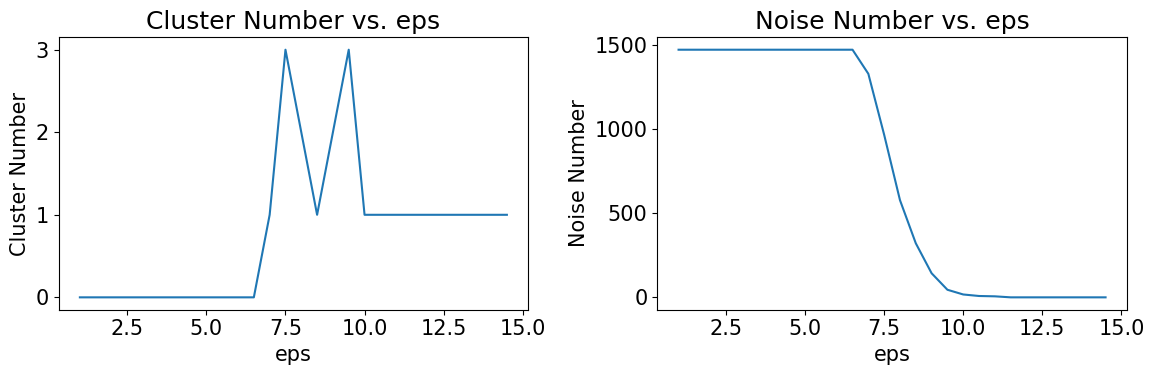

In [141]:
cluster_list = []
n_noise__list = []

for i in [x for x in np.arange(1, 15, 0.5)]:
    db = DBSCAN(eps=i, min_samples=10, metric='euclidean').fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    cluster_list.append(n_clusters_)
    n_noise__list.append(n_noise_)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot([x for x in np.arange(1, 15, 0.5)], cluster_list)
ax1.set_title('Cluster Number vs. eps')
ax1.set_xlabel('eps')
ax1.set_ylabel('Cluster Number')

ax2.plot([x for x in np.arange(1, 15, 0.5)], n_noise__list)
ax2.set_title('Noise Number vs. eps')
ax2.set_xlabel('eps')
ax2.set_ylabel('Noise Number')

plt.tight_layout()
plt.show()

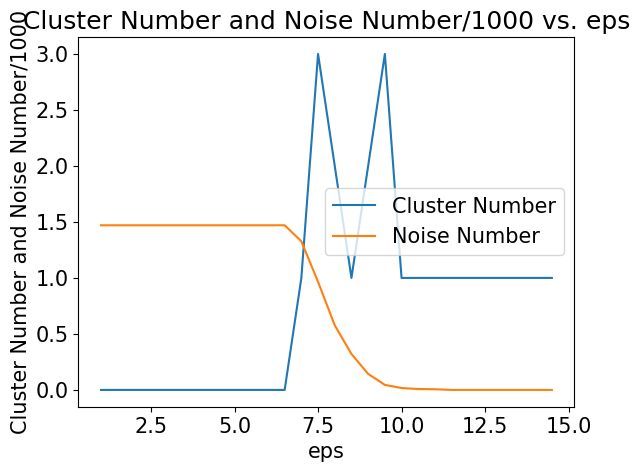

In [145]:
# Create the line chart
plt.plot([x for x in np.arange(1, 15, 0.5)], cluster_list, label='Cluster Number')
plt.plot([x for x in np.arange(1, 15, 0.5)], [x / 1000 for x in n_noise__list], label='Noise Number')

# Add labels and title
plt.xlabel('eps')
plt.ylabel('Cluster Number and Noise Number/1000')
plt.title('Cluster Number and Noise Number/1000 vs. eps')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [148]:
# Compute DBSCAN
db = DBSCAN(eps=9.5, min_samples=10, metric='euclidean').fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [150]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [151]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 45
Silhouette Coefficient: 0.117


In [152]:
n_noise_

45

### Use Gower Distance in DBSCAN

In [157]:
gower.gower_matrix(df)

array([[0.        , 0.60431135, 0.39336267, ..., 0.47849396, 0.4831057 ,
        0.45223576],
       [0.60431135, 0.        , 0.5384697 , ..., 0.33762914, 0.31373566,
        0.43648687],
       [0.39336267, 0.5384697 , 0.        , ..., 0.42052752, 0.4711175 ,
        0.38009343],
       ...,
       [0.47849396, 0.33762914, 0.42052752, ..., 0.        , 0.45685077,
        0.31486797],
       [0.4831057 , 0.31373566, 0.4711175 , ..., 0.45685077, 0.        ,
        0.33637807],
       [0.45223576, 0.43648687, 0.38009343, ..., 0.31486797, 0.33637807,
        0.        ]], dtype=float32)

In [158]:
dbscan = DBSCAN(eps=9.5, min_samples=10, metric='precomputed')
dbscan.fit(gower.gower_matrix(df))
labels = dbscan.labels_

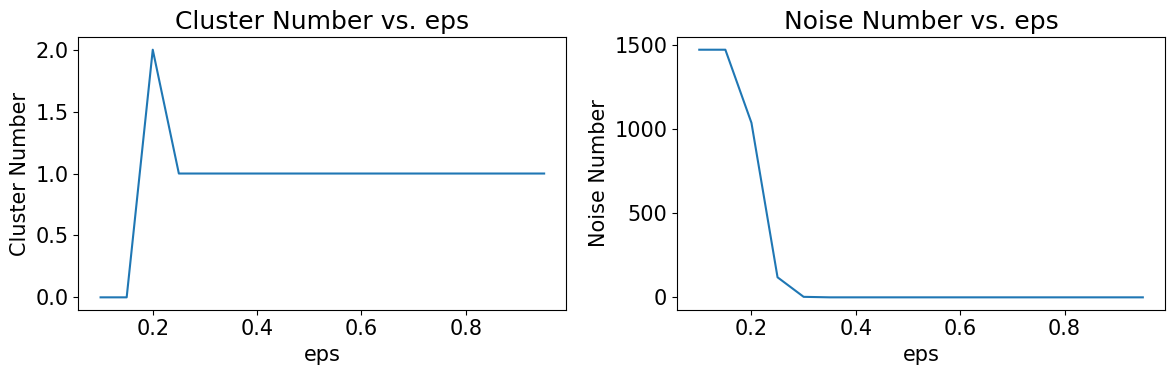

In [166]:
cluster_list = []
n_noise__list = []

for i in [x for x in np.arange(0.1, 1, 0.05)]:
    db = DBSCAN(eps=i, min_samples=10, metric='precomputed')
    db.fit(gower.gower_matrix(df))
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    cluster_list.append(n_clusters_)
    n_noise__list.append(n_noise_)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot([x for x in np.arange(0.1, 1, 0.05)], cluster_list)
ax1.set_title('Cluster Number vs. eps')
ax1.set_xlabel('eps')
ax1.set_ylabel('Cluster Number')

ax2.plot([x for x in np.arange(0.1, 1, 0.05)], n_noise__list)
ax2.set_title('Noise Number vs. eps')
ax2.set_xlabel('eps')
ax2.set_ylabel('Noise Number')

plt.tight_layout()
plt.show()

In [170]:
dbscan = DBSCAN(eps=0.25, min_samples=10, metric='precomputed')
dbscan.fit(gower.gower_matrix(df))
labels = dbscan.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [176]:
df.shape

(1470, 31)

In [179]:
mask2 = labels == -1
outlier_df = df[mask2]
outlier_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
27,36,Yes,Travel_Rarely,1218,Sales,9,Master,Life_Sciences,High,Male,...,Outstanding,Medium,0,10,4,Better,5,3,0,3
33,32,Yes,Travel_Frequently,1125,Research_Development,16,Below_College,Life_Sciences,Medium,Female,...,Outstanding,Medium,0,10,5,Better,10,2,6,7
58,41,Yes,Travel_Rarely,1360,Research_Development,12,Bachelor,Technical_Degree,Medium,Female,...,Excellent,Very_High,0,23,0,Better,22,15,15,8
68,44,No,Travel_Rarely,1488,Sales,1,Doctor,Marketing,Medium,Female,...,Outstanding,High,1,9,2,Good,4,3,1,3
80,50,No,Travel_Rarely,989,Research_Development,7,College,Medical,Medium,Female,...,Excellent,Very_High,1,29,2,Good,27,3,13,8


In [174]:
# Remove outliers
mask = labels != -1
filtered_df = df[mask]
filtered_df.shape

(1351, 31)

In [178]:
filtered_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,College,Life_Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
2,49,No,Travel_Frequently,279,Research_Development,8,Below_College,Life_Sciences,High,Male,...,Outstanding,Very_High,1,10,3,Better,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research_Development,2,College,Other,Very_High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
5,33,No,Travel_Frequently,1392,Research_Development,3,Master,Life_Sciences,Very_High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
7,27,No,Travel_Rarely,591,Research_Development,2,Below_College,Medical,Low,Male,...,Excellent,Very_High,1,6,3,Better,2,2,2,2
